In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [2]:
image_directory = 'datasets/'

In [3]:
no_tumor_images = os.listdir(image_directory + 'no/')
yes_tumor_images = os.listdir(image_directory + 'yes/')


In [4]:
dataset = []
label = []

In [5]:
INPUT_SIZE = 224

In [6]:
# Load and process the images
for i, image_name in enumerate(no_tumor_images):
    if image_name.split('.')[-1] == 'jpg':
        image = cv2.imread(image_directory + 'no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [7]:
for i, image_name in enumerate(yes_tumor_images):
    if image_name.split('.')[-1] == 'jpg':
        image = cv2.imread(image_directory + 'yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [8]:
# Convert dataset and label to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)


In [10]:
# Normalize dataset
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)



In [11]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [12]:
# Build the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

C:\Users\koush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,797,730 (10.67 MB)

 Trainable params: 2,797,730 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size=32, verbose=1, epochs=6, validation_data=(x_test, y_test), shuffle=False)

Epoch 1/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 394ms/step - accuracy: 0.7037 - loss: 0.5834 - val_accuracy: 0.8167 - val_loss: 0.4063
Epoch 2/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 487ms/step - accuracy: 0.8670 - loss: 0.3265 - val_accuracy: 0.9050 - val_loss: 0.2376
Epoch 3/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 299ms/step - accuracy: 0.9156 - loss: 0.2160 - val_accuracy: 0.9717 - val_loss: 0.1129
Epoch 4/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 473ms/step - accuracy: 0.9639 - loss: 0.1025 - val_accuracy: 0.9683 - val_loss: 0.0926
Epoch 5/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 412ms/step - accuracy: 0.9733 - loss: 0.0705 - val_accuracy: 0.9717 - val_loss: 0.0938
Epoch 6/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 545ms/step - accuracy: 0.9787 - loss: 0.0578 - val_accuracy: 0.9767 - val_loss: 0.0799


In [16]:
# Save the model
model.save('BrainTumor50EpochsCategorical3.h5')


In [38]:
%matplotlib inline


Epoch 1/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 427ms/step - accuracy: 0.9875 - loss: 0.0308 - val_accuracy: 0.9833 - val_loss: 0.0512
Epoch 2/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.9952 - loss: 0.0167 - val_accuracy: 0.9817 - val_loss: 0.0518
Epoch 3/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step - accuracy: 0.9942 - loss: 0.0225 - val_accuracy: 0.9883 - val_loss: 0.0515
Epoch 4/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - accuracy: 0.9938 - loss: 0.0169 - val_accuracy: 0.9817 - val_loss: 0.0743
Epoch 5/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step - accuracy: 0.9929 - loss: 0.0203 - val_accuracy: 0.9850 - val_loss: 0.0549
Epoch 6/6
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9800 - val_loss: 0.0615


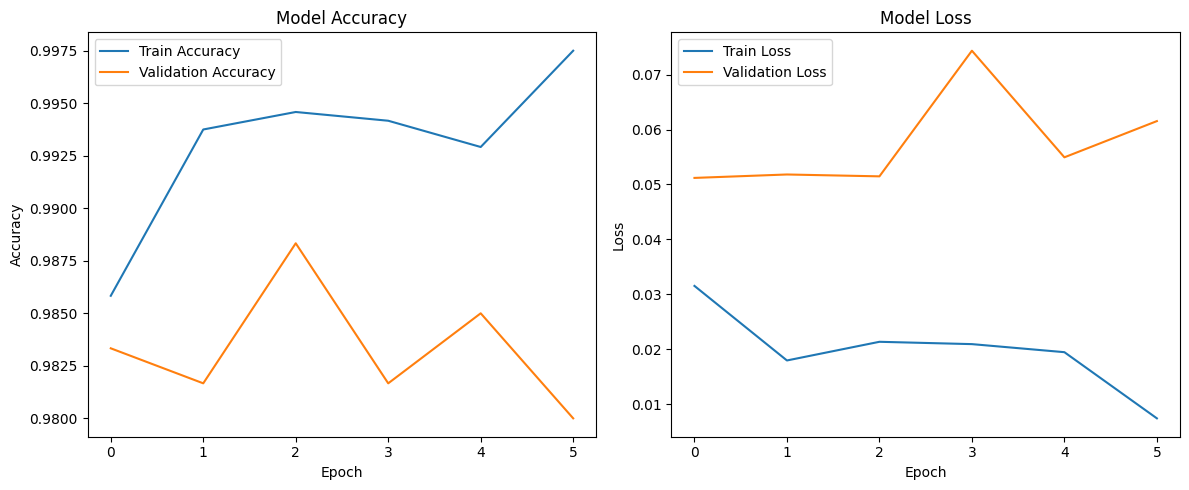

In [40]:
import matplotlib.pyplot as plt

# Train the model and capture the history
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=6,
    validation_data=(x_test, y_test),
    shuffle=False,
    verbose=1
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step


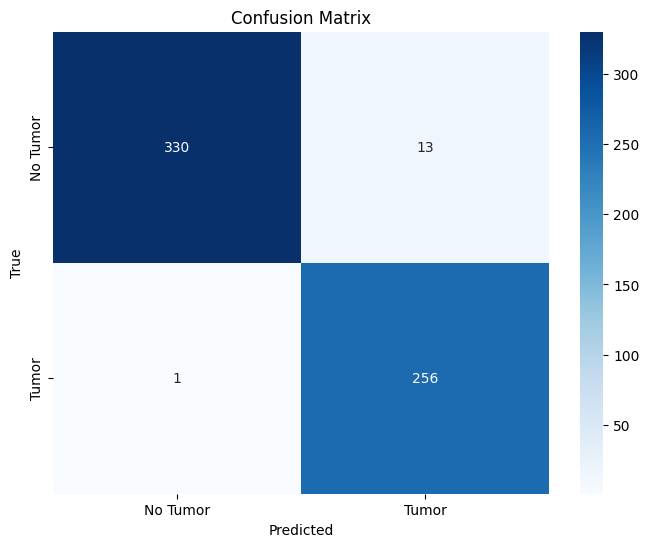

Classification Report:
              precision    recall  f1-score   support

    No Tumor       1.00      0.96      0.98       343
       Tumor       0.95      1.00      0.97       257

    accuracy                           0.98       600
   macro avg       0.97      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred_classes):
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_true, y_pred_classes)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['No Tumor', 'Tumor']))


In [45]:
plt.savefig('model_accuracy.png')

<Figure size 640x480 with 0 Axes>

In [46]:
plt.savefig('model_loss.png')

<Figure size 640x480 with 0 Axes>

In [47]:
plt.savefig('confusion_matrix.png')

<Figure size 640x480 with 0 Axes>